# Neural Network

In [9]:
# system tools
import os
import sys
sys.path.append("..")

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# machine learning stuff
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# visualisation
import matplotlib.pyplot as plt

In [2]:
# reading in data
filename = os.path.join("..","..","..","..", "cds-language", "data","fake_or_real_news.csv")

data = pd.read_csv(filename, index_col=0)

In [3]:
# checking data
data.sample(10)

,title,text,label
2278,Ark. governor won't sign 'religious freedom' b...,LITTLE ROCK — As local and state leaders and o...,REAL
7618,JUST IN: Republicans Sued Over Trump’s Call To...,\nThe Democratic National Committee just hau...,FAKE
774,Martha MacCallum: It's Donald Trump's moment. ...,And then there was one.\n\nThere is an express...,REAL
4028,Russia and Iran both propping up Assad. A bala...,While Russia's increased presence in Syria giv...,REAL
751,"Hillary Clinton narrowly wins Kentucky, a stat...","For weeks, Hillary Clinton has looked for the ...",REAL
647,Bernie Sanders is expected to endorse Hillary ...,It's amazing to go back and watch Bernie Sande...,REAL
9332,"Is Halloween Evil? Why Witches, Occultists And...","in: Faith , US News On October 31st, most peop...",FAKE
5821,Michael Moore Owes Me $4.99,"Posted on October 27, 2016 by DavidSwanson \nM...",FAKE
8902,The First Space Photo Of Earth - Shot From A T...,« Previous - Next » The First Space Photo Of E...,FAKE
4961,Opinion: The flaws of Trumpspeak,Michael D'Antonio is the author of the new boo...,REAL


In [4]:
# data variables containing text and labels
X = data["text"]
y = data["label"]

In [5]:
# creating a 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X,           # texts for the model
                                                    y,          # classification labels
                                                    test_size=0.2,   # create an 80/20 split
                                                    random_state=42) # random state for reproducibility

In [6]:
# creating vectorizer object in order to turn text into a vector of number
vectorizer = TfidfVectorizer(ngram_range = (1,2),     # unigrams and bigrams
                             lowercase =  True,       # avoid word differentiation by capitalization 
                             max_df = 0.95,           # remove very common words
                             min_df = 0.05,           # remove very rare words
                             max_features = 100)      # keep top 100 features

In [7]:
# fit vector number to training data
X_train_feats = vectorizer.fit_transform(X_train)

# fit vector number to test data
X_test_feats = vectorizer.transform(X_test)

# get feature names
feature_names = vectorizer.get_feature_names_out()


In [10]:
# create neural network classifier 
classifier = MLPClassifier(activation = "logistic",
                           hidden_layer_sizes = (20,),
                           max_iter=1000,
                           random_state = 42)

In [11]:
# fit neural network classifier to training data
classifier = classifier.fit(X_train_feats, y_train)

In [12]:
# test classifier on test data
y_pred = classifier.predict(X_test_feats)
print(y_pred[:20])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL'
 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'FAKE' 'REAL' 'REAL' 'REAL']


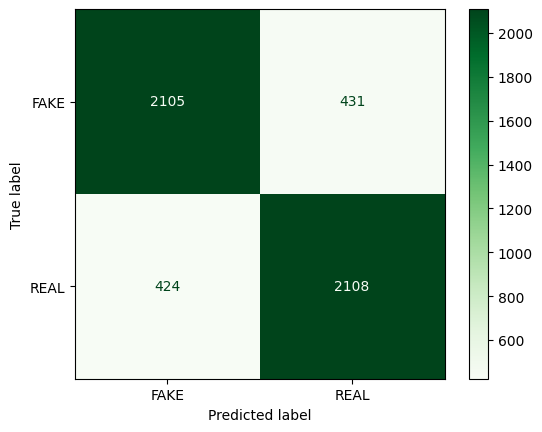

In [15]:
# evaluate model with confusion matrix
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Greens,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in your data arranged alphabetically

In [16]:
# calculating classification report
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.84      0.82      0.83       628
        REAL       0.83      0.85      0.84       639

    accuracy                           0.84      1267
   macro avg       0.84      0.83      0.83      1267
weighted avg       0.84      0.84      0.84      1267



In [17]:
# save model
from joblib import dump, load
dump(classifier, "../models/LR_classifier.joblib")

['../models/LR_classifier.joblib']

In [ ]:
# save classification report
f = open("../out/Classification_Report_NeuNet.txt", "w")
f.write(classifier_metrics)
f.close()